# Forecasting

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [7]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller

In [4]:
pal = sns.color_palette()

## Airline passengers

In [5]:
airline_data_file = pathlib.Path('AirPassengers.csv')
air_passengers = pd.read_csv(
    airline_data_file, header=0, parse_dates=[0]).rename(columns={
    'Month': 'month',
    '#Passengers': 'passengers'
}).set_index('month')

air_passengers.shape

(144, 1)

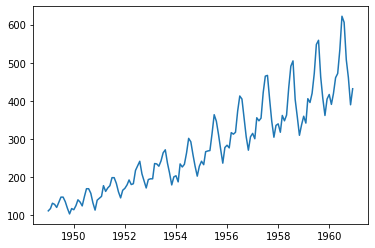

In [6]:
plt.plot(air_passengers)

## Detrend the data

<AxesSubplot:xlabel='month'>

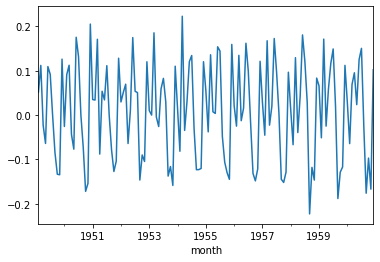

In [9]:
log_air_passengers = np.log(air_passengers.passengers)
log_air_passengers_diff = (
    log_air_passengers - log_air_passengers.shift()).dropna()
log_air_passengers_diff.plot()

Augmented Dickey Fuller test

In [17]:
useful_values_raw = adfuller(log_air_passengers_diff, autolag='AIC', regression='c')[:5]
useful_values = [v for v in useful_values_raw[:4]]
useful_values.extend([useful_values_raw[4]['1%'], useful_values_raw[4]['5%'], useful_values_raw[4]['10%']])
pd.DataFrame({
    'Value': useful_values,
    'Label': ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations',
              'Critical value for 1%', 'Critical value for 5%', 'Critical value for 10%']
})

,Value,Label
0,-2.717131,Test Statistic
1,0.071121,p-value
2,14.000000,#Lags Used
3,128.000000,Number of Observations
4,-3.482501,Critical value for 1%
5,-2.884398,Critical value for 5%
6,-2.578960,Critical value for 10%


In [21]:
lag_acf = acf(log_air_passengers_diff.values, nlags=20, fft=False)
lag_pacf = acf(log_air_passengers_diff.values, nlags=20)

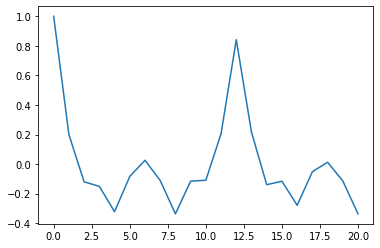

In [22]:
plt.plot(lag_acf)

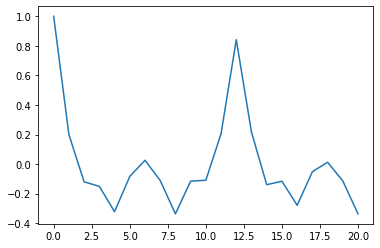

In [23]:
plt.plot(lag_pacf)